<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EB%B0%91%EB%94%A51/4.%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.퍼셉트론

- 다수의 신호를 입력으로 받아 하나의 신호로 출력

입력이 2개인 퍼셉트론의 예

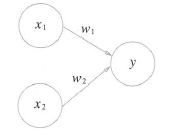

각 입력 신호에 가중치를 곱하고 그 값들을 더해서 한계값을 넘어설 때만 1을 출력합니다.

$y = 0$일 때 $(w_1x_1 + w_1x_2 \leq \theta)$



$y = 1$일 때 $ (w_1x_1 + w_1x_2 > \theta)$


가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소입니다.

가중치가 클수록 해당 신호가 그만큼 더 중요하다는 의미입니다.

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    

In [ ]:
# 실험해보기

print(AND(0, 0), '\n')
print(AND(1, 0), '\n')
print(AND(0, 1), '\n')
print(AND(1, 1), '\n')



0 

0 

0 

1 



### 2.3.2 가중치와 편향 도입


$y = 0$일 때 $(w_1x_1 + w_1x_2 + b \leq 0)$

$y = 1$일 때 $ (w_1x_1 + w_1x_2 +b > 0)$

<br>

> $\theta$를 $-b$로 치환하면 다음과 같이 표현이 가능합니다.

In [ ]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
np.sum(w*x) + b 

-0.19999999999999996

### 2.3.2 가중치와 편향 도입


AND에 편향을 도입해보자

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b 
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1
    

NAND와 OR게이트 구현

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])# AND에서 가중치만 -로 변환
    b = 0.7

    tmp = np.sum(w*x) + b 
    if tmp <= 0:
        return 0
    else: return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 # 두 개중 하나만 값을 가져도 임계값을 넘게 설정

    tmp = np.sum(w*x) + b 
    if tmp <= 0:
        return 0
    else: return 1

## 2.4 퍼셉트론의 한계

###2.4.1 도전 XOR 게이트

> 베타적 논리합으로 입력값이 서로 다를 때만 1이 출력됨!

하나의 게이트만으로는 (선형 결정 분리로는) 불가능한 문제!

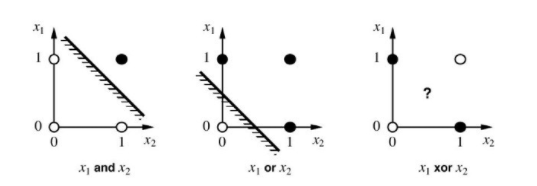

### 2.5.2  XOR 게이트 구현하기

다층 퍼셉트론으로 OR, NAND, AND를 쌓으면 해결할 수있다. 

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


활성화 함수를 사용하지않아도 층을 쌓아 비선형을 만들 수 있다!

- 이번장 정리

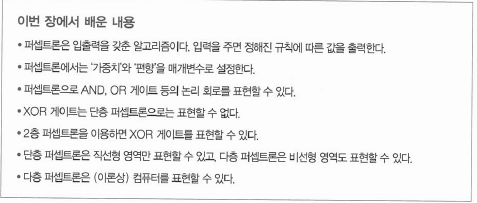

#3.신경망

- 앞장에서는 우리가 일일히 가중치를 수정해주었지만 신경망에서는 데이터로부터 가중치를 자동으로 학습합니다.


## 3.1 퍼셉트론에서 신경망으로

신경망과 퍼셉트론은 공통점이 많습니다. 이번 절에서는 다른 점을 중심으로 알아보겠습니다.


### 3.1.1 신경망의 예

다음 그림에서 가장 왼쪽 줄은 입력층, 그 다음 줄은 은닉층, 마지막 줄은 출력층이라고 합니다.

이 책에서는 입력층에서 출력층 방향으로 0층, 1층, 2층이라고 하겠습니다.

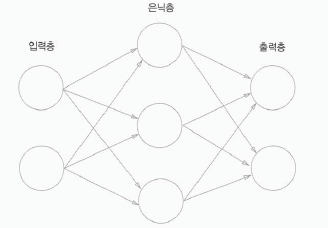

### 3.1.2 퍼셉트론과의 차이점

- 활성화 함수의 등장

퍼셉트론과 다르게 입력값과 가중치의 곱과 편향의 합을 활성화 함수에 넣어주는 과정을 거치게 됩니다.

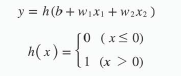

> 그림으로 표현한 예시

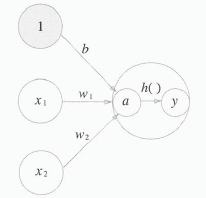

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수

신경망에서 자주 쓰이는 활성화 함수 시그모이드 함수를 나타내는 식입니다.

$$h(x) = \frac 1 {1 + exp(-x)}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 이걸로는 그래프를 그릴 때 차원이 맞지 않음!


시그모이드 그래프 그려보기

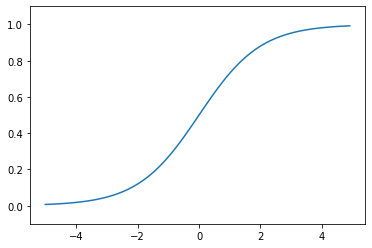

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

###3.2.2 계단 함수 구현하기


In [ ]:
def step_function(x):
    if x>0:
        return 1
    else: return 0

# 조금 더 간결하게

def step_function(x):
    y = x>0
    return y.astype(np.int)

계단 함수의 그래프

이제 앞에서 정의한 계단 함수의 그래프를 그려봅시다.

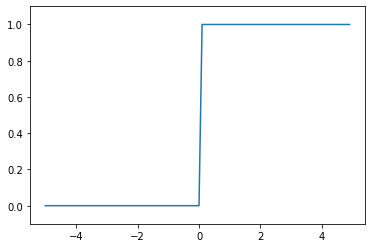

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    y = x>0
    return y.astype(np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.3 시그모이드 함수와 계단 함수 비교

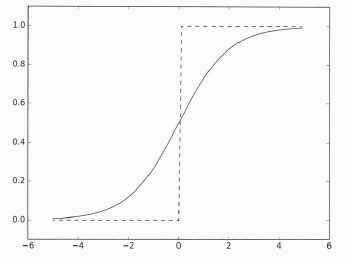

- 시그모이드는 연속적으로 변하는 반면 계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버립니다. 

- 시그모이드 함수의 이 매끈함은 신경망 학습에서 아주 중요한 역할을 합니다.(미분이 가능!)

### 3.2.4 ReLU 함수

sigmoid의 가중치 손실 문제를 해결한 활성화 함수

- 입력이 0이하면 0을 출력 0보다 큰 수면 그대로 출력하는 함수

In [ ]:
def relu(x):
    return np.maximum(0, x)# 두 입력중 큰값을 선택하여 반환!
    

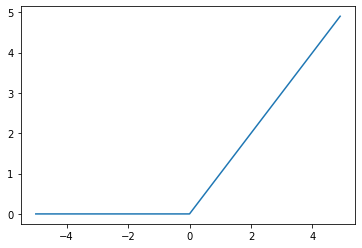

In [ ]:
#이전에 만들어둔 데이터 사용

y = relu(x)
plt.plot(x, y)
plt.show()

## 3.3 다차원 배열의 계산



딥러닝에서는 대량의 데이터를 사용하기 때문에 다차원 배열을 사용해야 됩니다.

2차원 배열은 행렬의 연산과 같은 연산 방식을 가집니다.

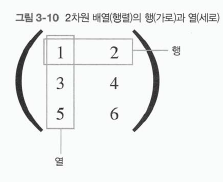

행렬의 내적(행렬 곱)의 방법은 1번째 행렬의 행과 2번째 행렬의 열을 원소끼리 곱해서 더하면 됩니다.

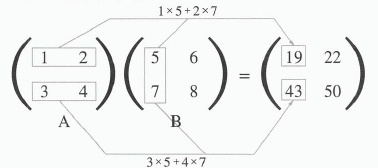

이때 출력물은 앞쪽의 행 shape과 뒤쪽의 열 shape을 따라가게 됩니다.

## 3.4 3층 신경망 구현하기

1층에서의 연산 과정

In [ ]:
x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(x, w1) + b

print(A1)

Z1 = sigmoid(A1) # 활성화 함수를 거침

print(Z1)

[-0.5 -0.2  0.1]
[0.37754067 0.450166   0.52497919]


2층에서의 연산 과정

In [ ]:
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, w2) + b2
Z2 = sigmoid(A2)

print(Z2)

[0.59514619 0.7091144 ]


3층에서의 과정 (항등함수 사용!)

In [ ]:
w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

Z3 = np.dot(Z1, w2) + b2


print(Z3)

[0.38528102 0.89108678]


구현 정리!

In [ ]:
def init_network():
    network = {} # 빈 딕셔너리에
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network # 딕셔너리로 간편하게 부를 수 있음

def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    z3 = np.dot(z2, w3) + b3

    return z3

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있습니다. 다만 문제에 따라 출력층에서 사용하는 활성화 함수가 달라집니다. 회귀에서는 항등 함수를 분류에서는 소프트 맥스 함수를 사용합니다.

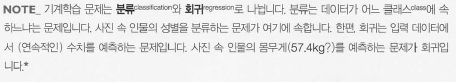

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등 함수는 입력과 출력이 같은 함수를 말합니다.

반면 분류에 사용하는 소프트맥스 함수는 전체에서 해당 비율을 구합니다.(지수 함수를 사용하여 확률적으로 볼 수 있게 만들어줌!)

- 소프트 맥스 출력의 총합은 1입니다.

$$y_k = \frac {exp(a_k)} {\Sigma^n_{i=1} exp(a_i)}$$


> 소프트맥스 함수는 모든 입력 신호로부터 영향을 받게됩니다.

In [ ]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


- 소프트맥스 함수를 구현할 때 조심할 점

지수 함수는 쉽게 큰 값을 출력핪니다. 이렇게 아주 큰 값끼리 나눗셈을 하면 결과 수치가 불안정 해집니다.

> $e^{100} $은 0이 140개가 넘음

- 문제 해결 방안

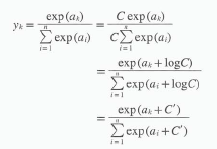

C라는 임의의 정수를 분자와 분모 양쪽에 곱했습니다.(로그에서 곱셈은 덧셈으로 변형 가능!)

여기서 C에는 오버플로를 막기 위해서 입력 신호 중 최대값을 넣습니다.

> 값 범위를 최대값으로 빼서 바꿉니다. 정규화 기법과 비슷해보입니다.

In [ ]:
import numpy as np

def softmax(a):
    c = max(abs)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a - c)
    y = exp_a / sum_exp_a
    return y

## 3.6 손글씨 숫자 인식

In [ ]:
# 케라스에서 데이터를 가져왔습니다.

import tensorflow as tf 
import numpy as np 
from tensorflow import keras

mnist = keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train.shape

(60000, 28, 28)

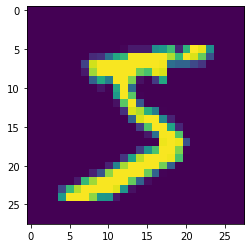

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

# 책에서는 flatten을 진행했으므로

x_train_t = x_train.reshape(60000, 784)
y_train_t = y_train.reshape(60000, )
x_test_t = x_test.reshape(10000, 784)
y_test_t = y_test.reshape(10000, )


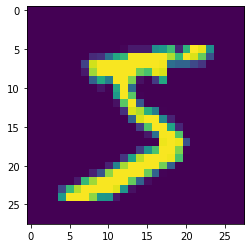

In [ ]:
plt.imshow(x_train_t[0].reshape(28, 28))
plt.show()

본격적으로 데이터가 필요하기에 git clone을 하겠습니다.


In [34]:
!git clone 'https://github.com/audrb1999/deep-learning-from-scratch'

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 791, done.
remote: Total 791 (delta 0), reused 0 (delta 0), pack-reused 791
Receiving objects: 100% (791/791), 52.15 MiB | 39.36 MiB/s, done.
Resolving deltas: 100% (456/456), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/deep-learning-from-scratch/ch03')

In [ ]:
!dir

deep-learning-from-scratch  __pycache__        sigmoid.py
mnist_show.py		    README.md	       sig_step_compare.py
neuralnet_mnist_batch.py    relu.py	       step_function.py
neuralnet_mnist.py	    sample_weight.pkl


In [ ]:
# 이번 챕터에 필요한 함수들을 가져옵니다.
from neuralnet_mnist import get_data, init_network, predict

x, t = get_data()# train, test set을 전달
network = init_network()# 저장된 가중치 값들을 불러오고

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])# 순전파 진행
    p = np.argmax(y) # 가장 확률이 높은 예측의 인덱스를 가져와서
    if p == t[i]: # 비교하고 맞으면 accuracy_cnt에 +1를 진행
        accuracy_cnt += 1

print(f'Accuracy {float(accuracy_cnt)/ len(x)}')

Accuracy 0.9352


순전파를 진행할 때 행렬 연산이 이루어지므로 이때 알맞게 연산이 될 수 있도록 shape을 조절해줘야 합니다!

미니 배치를 적용하여 다시 예측해봅시다.

In [ ]:
# 이번 챕터에 필요한 함수들을 가져옵니다.
from neuralnet_mnist import get_data, init_network, predict

x, t = get_data()# train, test set을 전달
network = init_network()# 저장된 가중치 값들을 불러오고

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1) # 가장 확률이 높은 예측의 열 인덱스를 가져와서
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f'Accuracy {float(accuracy_cnt)/ len(x)}')

Accuracy 0.9352


- 이번장 정리

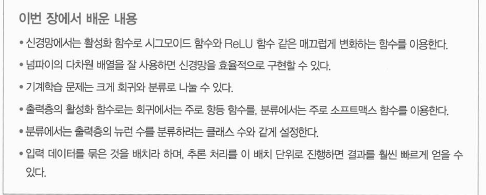

# 4.신경망 학습

##4.1 데이터로 학습

### 4.1.1 데이터 주도 학습

기계학습은 데이터가 생명입니다. 데이터속에서 답을 착고 데이터세어 패턴을 발견하는 것이 기계학습이죠. 데이터가 없으면 아무것도 시작되지 않습니다.



4.1.2 훈련 데이터와 시험 데이터

- 기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나누어 학습과 실험을 수행합니다.

- 훈련 데이터로 최적의 매개변수를 찾고 시험 데이터로 우리의 모델이 일반화가 잘 되어있는지 확인합니다.

## 4.2 손실 함수

- 우리가 정한 척도에 대해서 어느 정도의 성능을 가지는지 보여줍니다. 이 오차를 통해서 모델이 학습을 할 수 있습니다.

- 이미지 분야에서는 대게 사람 수준의 성능을 기준으로 잡고 기계학습을 통하여 그 수준에 도달하려 노력합니다.

> mnist분류에 대해서는 이미 기계학습이 사람 수준의 성능을 뛰어 넘었습니다.

4.2.1 평균 제곱 오차

가장 많이 쓰이는 함수로 수식은

$E = \frac 1 2 \sum\limits_{k} (y_k-t_k)^2$

- y = 예측값
- t = 정답 

2로 나누는 이유는 미분할 시 계수를 지워주기 위함입니다.


In [ ]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

4.2.2 교차 엔트로피 오차

또 다른 손실 함수 교차 엔트로피 오차도 자주 이용합니다.

수식은 다음과 같습니다.

$E = - \sum\limits_{k} t_k log y_k$

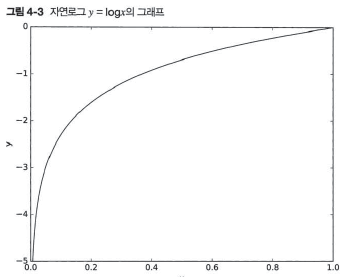

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

### 4.2.2 미니배치 학습

기계학습 문제는 훈련 데이터를 사용해 학습합니다. 더 구체적 말하면  훈련 데이터에 대한 손실 함수의 값을 구하고 그 값을 최대한 줄여주는 매개변수를 찾아냅니다.

100개의 데이터가 있으면 100개의 손실 함수 값들의 합을 지표로 삼는 것입니다.

In [ ]:
# 미니 배치용 교차 엔트로피 오차 구현하기
def cross_entropy_error(y, t):
    if y.dim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

# 정답 레이블이 원 핫 인코딩이 아니라 2, 7등의 숫자 레이블로 주어졌을 때는

def cross_entropy_error(y, t):
    if y.dim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]) / batch_size

4.2.3 왜 손실 함수를 설정하는가?

정확도라는 지표를 두고 손실 함수의 값이라는 우회적인 방법을 사용하는 이유

- 미분의 역할에 주목한다면 해결됩니다, 미분이 가능해야 미분 값을 단서로 매개변수의 값을 서서히 갱신할 수 있습니다.

- 정확도를 지표로 사용하게 된다면 대부분의 장소에서 미분 값이 0이 되어 매개변수를 갱신할 수 없습니다.

> 100장 중 32장이 맞아서 32%의 정확도가 나왔다고 했을 떄 약간 파라미터를 조절해서 32.0123%과 같은 정확도가 나올 수 있을까요? 불연속적인 띄엄띄엄한 값이 나올 것입니다 34%같은

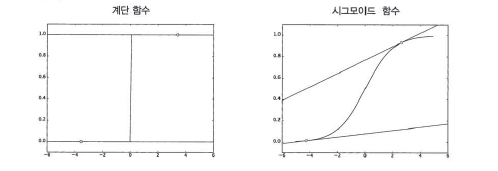

계단 함수는 대부분의 장소에서 기울기가 0!

## 4.3 수치 미분

- 미분을 할 때 변화량을 작은 수치로 두고 미분을 하는 방법입니다.

- 구현 방법이 간단하지만 오차가 있어서 해석적 미분에 대하여 경사 검사를 할 때 많이 사용합니다.

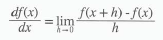

In [13]:
# 변화량은 1e-4가 적당합니다.
# 양쪽에 대한 변화량을 구하니 이것은 중앙 차분입니다.
# 근사로 구하는 것이기 때문에 

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

###4.3.1 수치 미분의 예



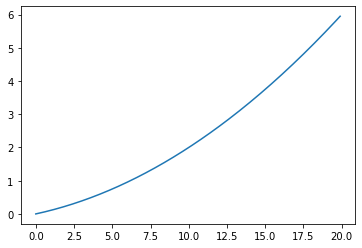

In [11]:
# 이 함수를 수치미분 해보자

import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
    return (0.01 * x ** 2) + (0.1*x)

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.show()

In [21]:
numerical_diff(function_1, 5)

0.1999999999990898

### 4.3.3 편미분

변수가 2개 이상일 때는 원하는 값만 미지수로 두고 나머지는 미지수로 표기하면 안된다.

In [23]:
def function_tmp(x):
    return x * x + 3 ** 2  # 원래 x0**2 + x1**2 

In [24]:
numerical_diff(function_tmp, 4)

7.999999999999119

## 4.4 기울기

앞 절에서 변수별로 계산을 했는데 동시에 계산하고 싶다면 어떻까요?

In [32]:

def function_2(x):
    return x[0] ** 2 + x[1] ** 2 

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # 같은 형상의 배열

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        h1 = f(x)

        x[idx] = tmp_val - h
        h2 = f(x)

        grad[idx] = (h1 - h2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [33]:
numerical_gradient(function_2, np.array([3., 4.0]))

array([6., 8.])

In [40]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): 
#f에 손실함수, init_x에 가중치 매개변수, lr에 학습률을 넣어줌
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 기울기를 구함
        x -= lr * grad # 경사 하강법
    return x

In [41]:
!dir

deep-learning-from-scratch  sample_data


## 4.5 학습 알고리즘 구현하기

In [42]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'deep-learning-from-scratch')) #'deep-learning-from-scratch-master' 폴더를 경로추가
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [46]:
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
# 데이터 불러옴

iters_num = 10000 #미니배치 반복횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

train_loss_list = [] 
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 
#1에폭 = 미니배치로 모든 데이터를 돌았을때

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + "," + str(test_acc))

train acc, test acc | 0.09035,0.0892
train acc, test acc | 0.7951666666666667,0.8018
train acc, test acc | 0.8758,0.8807
train acc, test acc | 0.89965,0.9037
train acc, test acc | 0.9080833333333334,0.9108
train acc, test acc | 0.9147333333333333,0.9164
train acc, test acc | 0.92095,0.9232
train acc, test acc | 0.9247666666666666,0.9267
train acc, test acc | 0.9282333333333334,0.9292
train acc, test acc | 0.9317666666666666,0.9324
train acc, test acc | 0.9348333333333333,0.9348
train acc, test acc | 0.93695,0.9369
train acc, test acc | 0.9402,0.94
train acc, test acc | 0.9419333333333333,0.9407
train acc, test acc | 0.9443333333333334,0.9425
train acc, test acc | 0.9464833333333333,0.9446
train acc, test acc | 0.9477,0.9464


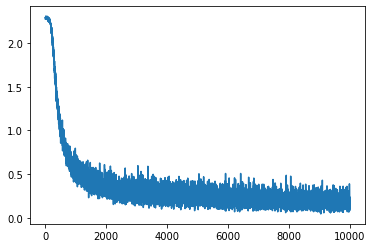

In [52]:
import matplotlib.pyplot as plt

plt.plot(range(10000), train_loss_list)
plt.show()

정리

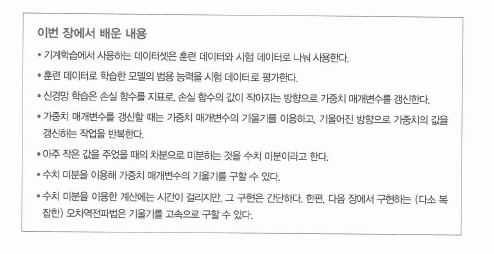